In [161]:
import pandas as pd
import os
import pydicom as dicom
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import SimpleITK as sitk


folder_path = r"C:/Users/samkr/Downloads/DICOM FILES/V1/OAI-AxT1-Thigh/3.C.2/9005321/20060920/11370402"
save_path = r"C:/Users/samkr/Downloads/DICOM FILES/V1/OAI-AxT1-Thigh/3.C.2/9005321/20060920/11370402"
number = 0

def rescale_linear(array, new_min, new_max):
    """Rescale an arrary linearly."""
    minimum, maximum = np.min(array), np.max(array)
    m = (new_max - new_min) / (maximum - minimum)
    b = new_min - m * minimum
    return m * array + b

In [162]:
def create_png(file):
    fileuse = sitk.ReadImage(file)
    img = sitk.GetArrayFromImage(fileuse)
    center = float (fileuse.GetMetaData("0028|1050"))
    width = float (fileuse.GetMetaData("0028|1051"))

    img_norm = rescale_linear (img, center-width/2, center+width/2)

    sns.distplot (img.flatten())
    sns.distplot (img_norm.flatten())
    #fig = plt.figure (figsize=(8, 6))
    cmap=plt.cm.bone
    plt.imshow (img[0], cmap)
    plt.savefig(save_path+"-slice"+"%03d" % number +".png")
    plt.show()
    
    plt.clf()

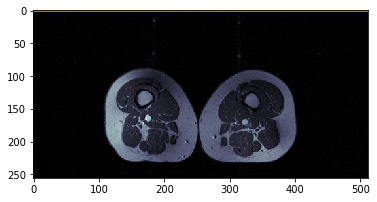

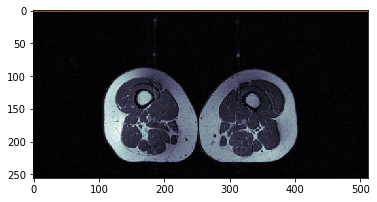

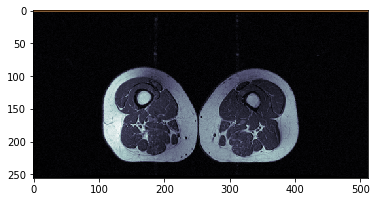

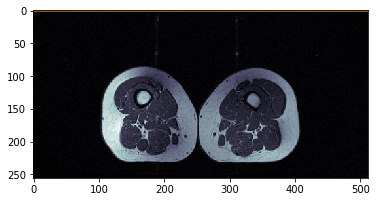

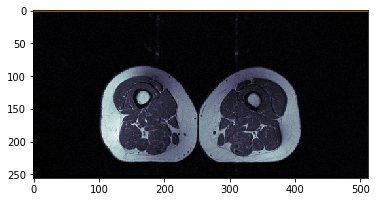

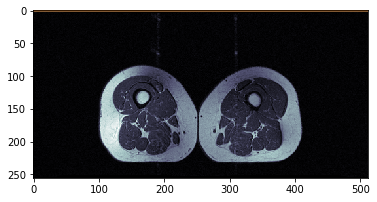

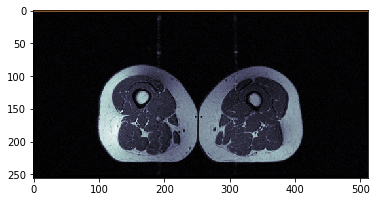

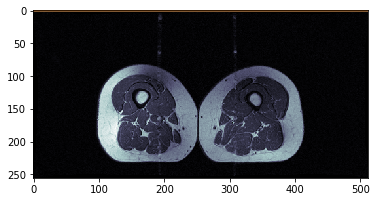

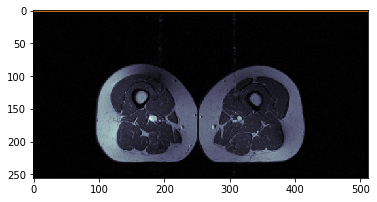

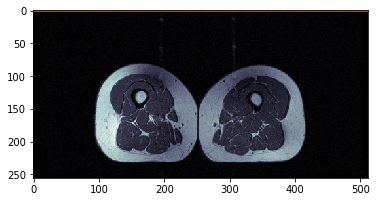

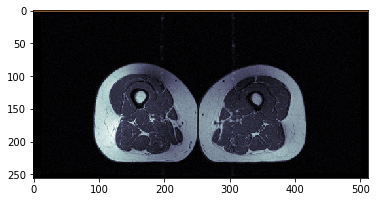

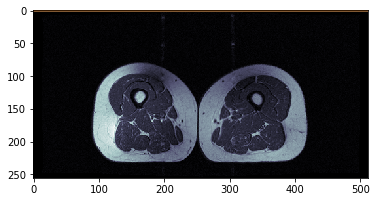

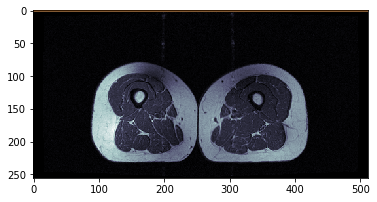

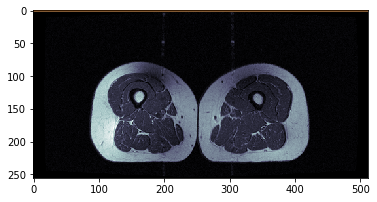

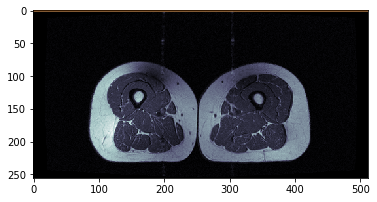

<Figure size 432x288 with 0 Axes>

In [163]:
number = 0
placeholder=[] 
for subdir, dirs, files in os.walk(folder_path):
    for file in files:
        #print(number)
        #joinedFile = sitk.ReadImage(os.path.join(folder_path,file))
        #num = int(file) - 1
        use = os.path.join(folder_path,file)
        create_png(use)
        #placeholder.append("'" + os.path.join(folder_path,file) +"'" )
        #create_png(joinedFile)
        #print (os.path.join(folder_path,file)

        #newSave = save_path+ "//" + r[37:].replace('//', "-") + "-slice" + "%03d" % num + ".png"
        #plt.imsave(r"C:/Users/samkr/Downloads/DICOM FILES/V1/OAI-AxT1-Thigh/3.C.2/9001897/20070129/11616202"+ "/" + r[37:].replace('//', "-") + "-slice" + "%03d" % num + ".png",img[0] )

        number += 1
        


#while number<len(placeholder):
    #filename = placeholder[number]
    #filename.replace("\","\/",1)
    #create_png(filename)
   # number +=1 




    